In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def gen_raspr(m1,m2,sig, num = 1000):
    s1 = np.random.normal(m1, sig, num)
    s2 = np.random.normal(m2, sig, num)
    return [s1,s2]

In [76]:
def draw_all(s1,s2,sh = 0.5):
    fig, ax = plt.subplots()
    s =  np.concatenate((s1, s2))
    bbb = np.arange(min(s), max(s), sh)
    ax.hist(s, bins = bbb  ,  alpha = 0.3, label = 's1 + s2')
    ax.hist(s1, bins = bbb, alpha = 0.3, label = 's1')
    ax.hist(s2, bins = bbb ,  alpha = 0.3 , label = 's2')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    plt.legend()
    plt.show()

In [77]:
def get_metrics(s):
    med = np.median(s)
    razm = max(s) - min(s)
    return [med, razm]

In [74]:
def work(m1 = 10, m2 = -10, d = 10, num = 10000, dr = False):
    s1,s2 = gen_raspr(m1,m2,d,num)
    if dr:
        draw_all(s1,s2, sh = 5)
    s = np.concatenate((s1, s2))
    norm.cdf(s)
    return get_metrics(s), [m1 + m2, 2*d**2], [np.mean(s), np.var(s)]

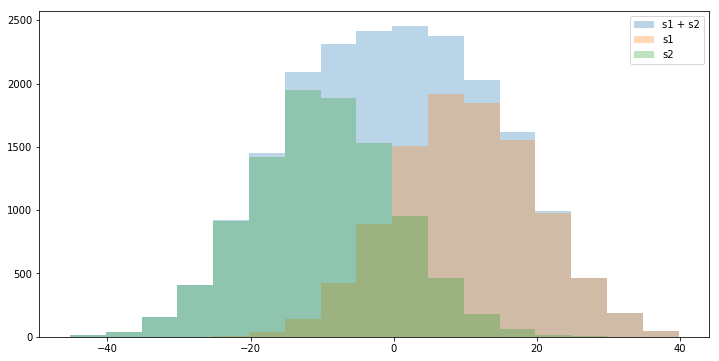

Медиана:  0.14236615404004382
Размах:  89.27614804397786
Теоретичесое матожидание/среднее выборки:  0 / 0.08146925739879479
Теоретическая дисперсия/дисперсия выборки:  200 / 199.8473541837331


In [88]:
rez, teor, pract = work(dr = True, num = 10000)
print("Медиана: ", rez[0])
print("Размах: ", rez[1])
print('Теоретичесое матожидание/среднее выборки: ', teor[0], '/', pract[0])
print('Теоретическая дисперсия/дисперсия выборки: ', teor[1], '/', pract[1])

In [89]:
def get_stats(dr = False, d = 10):
    steps0 = np.arange(50,90,10)
    steps1 = np.arange(100,900,100)
    steps2 = np.arange(1000,15000,1000)
    steps = np.concatenate((steps0, steps1, steps2))
    dm = []
    dd = []
    for i in steps:
        rez, teor, pract = work(num = int(i),dr = False, d = d)
        dm.append(abs(teor[0] - pract[0]))
        dd.append(abs(teor[1] - pract[1]))
    if dr:
        fig, ax = plt.subplots()
        ax.plot(steps, dm)
        ax.plot(steps, dd)
        fig.set_figwidth(16)
        fig.set_figheight(6)
        plt.show()
    return dm, dd, steps

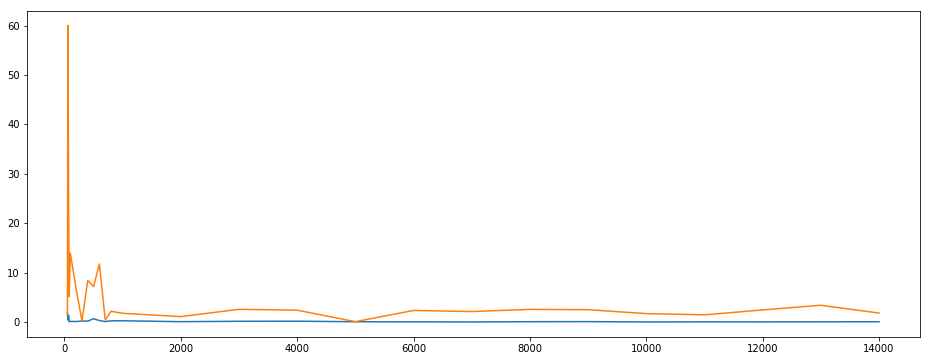

In [94]:
i = get_stats(True)

In [91]:
dm, dd, steps = get_stats()
sdm = np.array([dm])
sdd = np.array([dd])
for i in range(100):
    dm, dd, steps = get_stats()
    sdm = np.concatenate((sdm,np.array([dm])))
    sdd = np.concatenate((sdd,np.array([dd])))

In [92]:
srdm = np.mean(sdm, axis = 0)
srdd = np.mean(sdd, axis = 0)

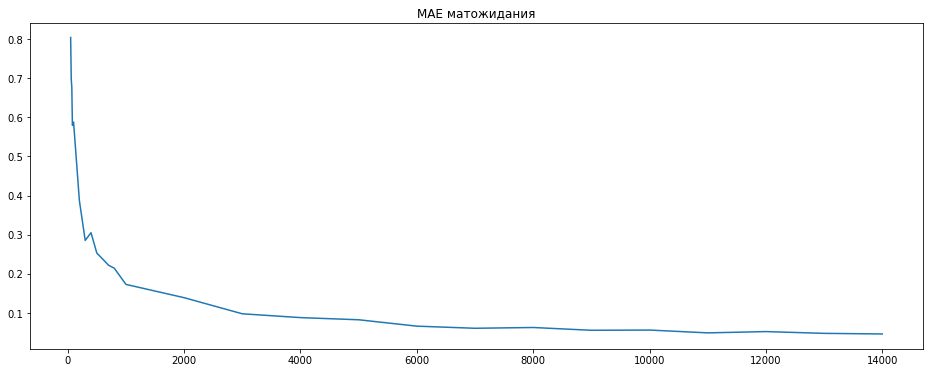

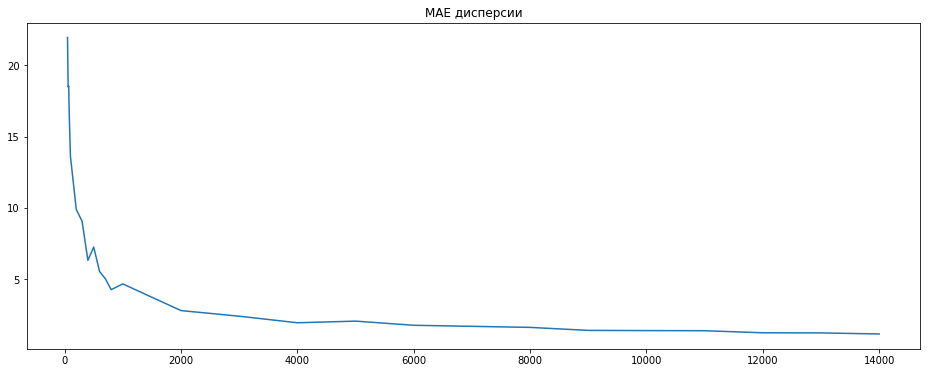

In [93]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
ax1.plot(steps, srdm)
ax2.plot(steps, srdd)
fig1.set_figwidth(16)
fig1.set_figheight(6)
ax1.title.set_text('MAE матожидания')
fig2.set_figwidth(16)
fig2.set_figheight(6)
ax2.title.set_text('МАЕ дисперсии')
plt.show()